<a href="https://colab.research.google.com/github/sanjana110404/SCT_DS_1/blob/main/SCT_DS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
data = {
    'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Age': [18,19,20,21,22,23,24,25,26,27],
    'GradeLevel': [9, 10, 11, 9, 10, 11, 9, 10, 11, 9],
    'MathScore': [75,80,85,90,95,75,80,85,85,90],
    'ReadingScore': [60,65,70,75,80,85,90,95,80,80],
    'Attendance': [55,60,65,70,75,80,85,90,95,80]
}

student_performance_df = pd.DataFrame(data)

In [3]:
# Check for missing values
print(student_performance_df.isnull().sum())

# No missing values found, so we can move on to the next step.

StudentID       0
Gender          0
Age             0
GradeLevel      0
MathScore       0
ReadingScore    0
Attendance      0
dtype: int64


In [4]:
# Normalize the MathScore column
student_performance_df['MathScore'] = (student_performance_df['MathScore'] - student_performance_df['MathScore'].min()) / (student_performance_df['MathScore'].max() - student_performance_df['MathScore'].min())

# Normalize the ReadingScore column
student_performance_df['ReadingScore'] = (student_performance_df['ReadingScore'] - student_performance_df['ReadingScore'].min()) / (student_performance_df['ReadingScore'].max() - student_performance_df['ReadingScore'].min())

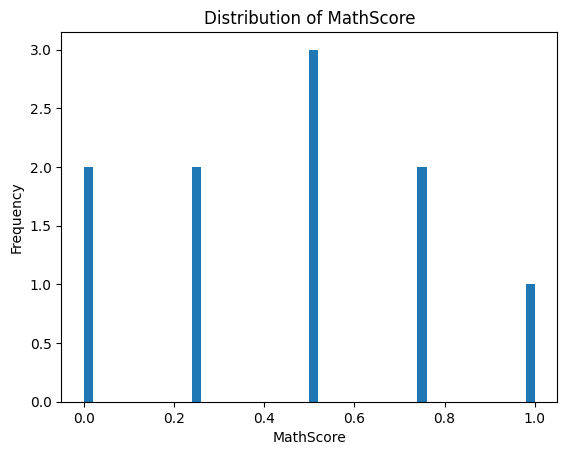

In [5]:
import matplotlib.pyplot as plt

plt.hist(student_performance_df['MathScore'], bins=50)
plt.xlabel('MathScore')
plt.ylabel('Frequency')
plt.title('Distribution of MathScore')
plt.show()

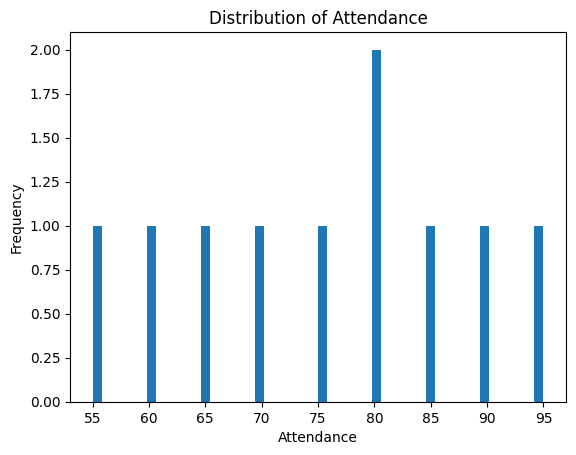

In [6]:
plt.hist(student_performance_df['Attendance'], bins=50)
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.title('Distribution of Attendance')
plt.show()

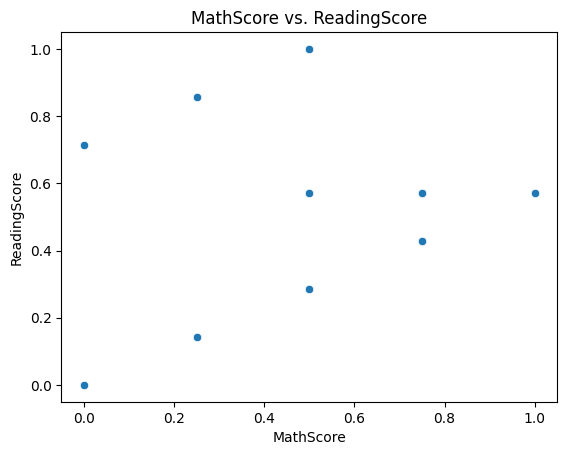

In [7]:
sns.scatterplot(x='MathScore', y='ReadingScore', data=student_performance_df)
plt.xlabel('MathScore')
plt.ylabel('ReadingScore')
plt.title('MathScore vs. ReadingScore')
plt.show()

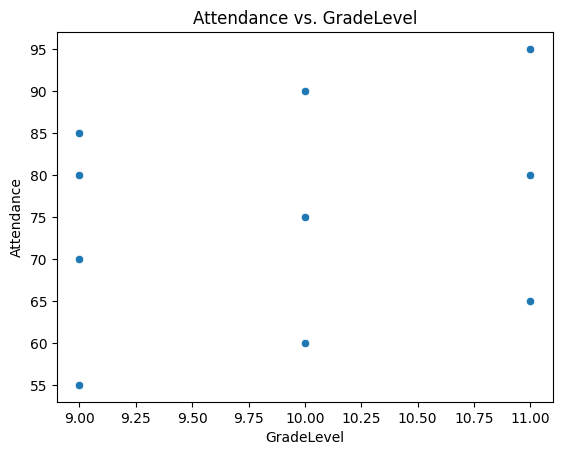

In [8]:
sns.scatterplot(x='GradeLevel', y='Attendance', data=student_performance_df)
plt.xlabel('GradeLevel')
plt.ylabel('Attendance')
plt.title('Attendance vs. GradeLevel')
plt.show()